# Investing in Stocks Project (Fall 2023)

# 1-Data Prepartion

## Select Stocks

The embedded link outlines the [Group Assigned Sectors](https:////docs.google.com/spreadsheets/d/16-7e3dNk_h02Vd3F_BtrbrQ27dbO7pIe4d-N1kRrI24/edit#gid=0). The three sectors assigned to Group 2 are as follows.

    A -- Materials Sector
    B -- Consumer Discretionary Sector
    C -- Industrials Sector

In each of the three sectors, we chose 10 stocks from the [List of S&P 500 companies](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), for a grand total of 30 stocks. These are shown in the following table.


>Stock | Materials  | Consumer Discretionary | Industrials
>--- | --- | --- | --- |
>1 | APD - Air Products and Chemicals | AMZN - Amazon | MMM - 3M
>2 | AVY - Avery Dennison | CMG - Chipotle Mexican Grill | ADP - ADP
>3 | BALL - Ball Corporation | GRMN - Garmin | AAL - American Airlines Group
>4 | CF - CF Industries | GM - General Motors | BA - Boeing
>5 | ECL - Ecolab | MAR - Marriot International | DAL - Delta Air Lines
>6 | IP - International Paper | MCD - McDonald's | FDX - FedEx
>7 | LIN - Linde plc | NKE - Nike, Inc. | HON - Honeywell
>8 | NEM - Newmont | SBUX - Starbucks | SWK - Stanley Black & Decker
>9 | NUE - Nucor | ULTA - Ulta Beauty | UNP - Union Pacific Corporation
>10 | SHW - Sherwin-Williams | WYNN - Wynn Resorts | WM - Waste Management

## Import Modules

Set up the Google Colaboratory environment.

In [ ]:
# Import useful modules
import numpy as np # for numeric functions
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [ ]:
# Import stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

## Import Data

Retrieve real-world daily stock data from the web, specifically Yahoo Finance API.

In [ ]:
# Assign the ticker list for stocks from each sector
tickers_materials = ['APD', 'AVY', 'BALL', 'CF', 'ECL', 'IP', 'LIN', 'NEM', 'NUE', 'SHW']
tickers_consumer = ['AMZN', 'CMG', 'GRMN', 'GM', 'MAR', 'MCD', 'NKE', 'SBUX', 'ULTA', 'WYNN']
tickers_industrials = ['MMM', 'ADP', 'AAL', 'BA', 'DAL', 'FDX', 'HON', 'SWK', 'UNP', 'WM']

# Create a complete list of all tickers
tickers_list = tickers_materials + tickers_consumer + tickers_industrials

# Pull historical price data for each stock
# For training, use daily data from January 1, 2017 to December 31, 2021
# For evaluating the performance of the strategies, use daily data from January 1, 2022 to December 31, 2022
dow_prices = {ticker : si.get_data(ticker, start_date = '01/01/2017', end_date = '12/31/2022', interval = '1d') for ticker in tickers_list}

In [ ]:
# To get an understanding of the imported data
# print(dow_prices)

Clean the data to only have what we need for the initial visualizations. Removing entries with missing or null values.

In [ ]:
# Extract only the data we need (adjclose)
# Get the adjclose price for APD (one sample)
prep_data = pd.DataFrame(dow_prices['APD']['adjclose']).rename(columns = {"adjclose":"APD"})

# Combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

# Take a look at the data frame
# prep_data

In [ ]:
# Drop any na records
prep_data.dropna(inplace=True)

In [ ]:
# Check to make sure there are no remaining null values
# print(prep_data.info())

## Visualize the Time Series

### Individual Stocks

Each of the following plots shows the trend for one individual stock in the portfolio.

The first two rows represent the Materials Sector, the third and fourth rows represent the Consumer Discretionary Sector, and the last two rows represent the Industrials Sector.

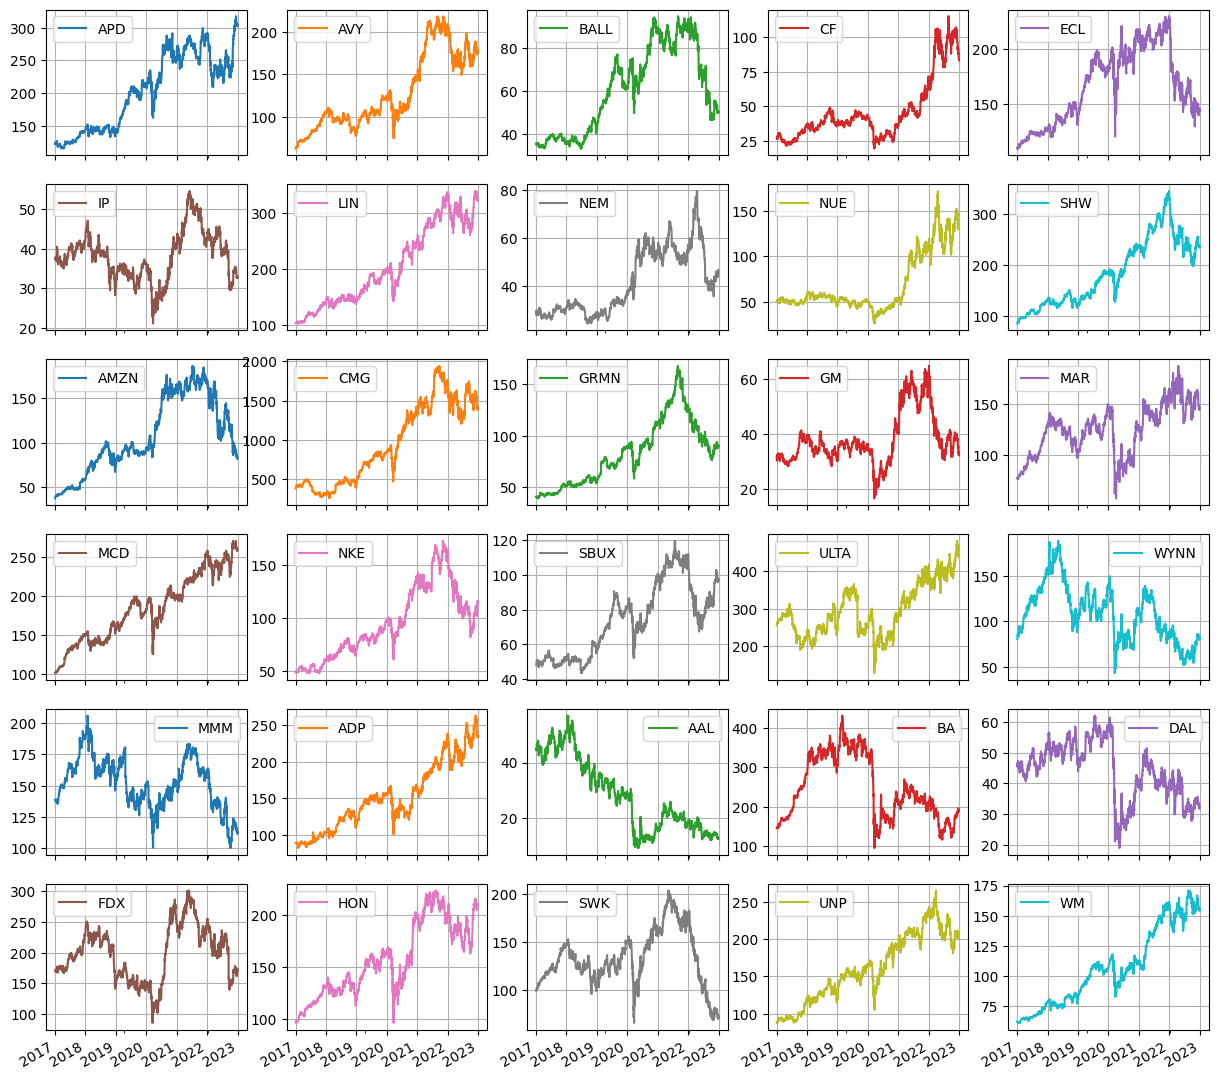

In [ ]:
# Creating a visualization for each stock, plotted individually
prep_data.plot(subplots=True, grid=True, layout=(6,5), figsize=(15,15))

# Showing the plots
plt.show()

In [ ]:
# Separate the 30 stocks into groups of 10, based on sector
materials_data = prep_data.iloc[:, :10]  # first 10 stocks, Materials
consumer_data = prep_data.iloc[:, 10:20]  # second 10 stocks, Consumer Discretionary
industrials_data = prep_data.iloc[:, -10:]  # last 10 stocks, Industrials

### Materials Sector, 2017-2022

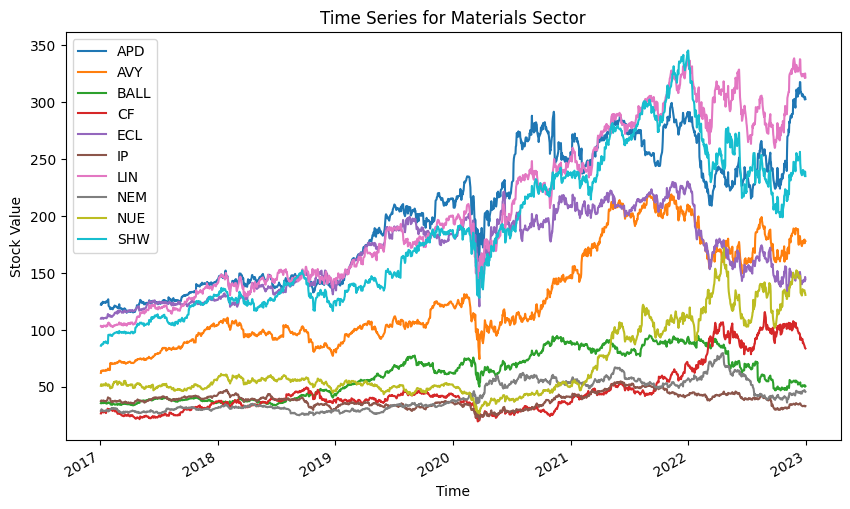

In [ ]:
# Plot the time series for the first 10 stocks, Materials
plt.figure(figsize=(10, 6))
materials_data.plot(ax=plt.gca())
plt.title('Time Series for Materials Sector')
plt.xlabel('Time')
plt.ylabel('Stock Value')
plt.legend(loc='upper left')
plt.show()

The time series for the Materials sector shows a spread of different behaviors.

Across the board, there is a slight dip in 2020, in line with the market crash following the start of the COVID-19 pandemic. Despite this temporary decrease, however, there seems to be a general upward trend in stock value across the years. This is most notable in the three stocks closest to the top of the plot, LIN (Linde plc), APD (Air Products and Chemicals), and SHW (Sherwin-Williams). NUE (Nucor) and CF (CF Industries) also show huge increases in value since 2020.

The stocks closest to the bottom of the plot appear to be the most unchanging from 2017 to 2023, though this may be a result of the scale of the plot.

None of the stocks, by the end of 2022, appear to be dramatically lower in value than where they started in 2017.



### Consumer Discretionary Sector, 2017-2022

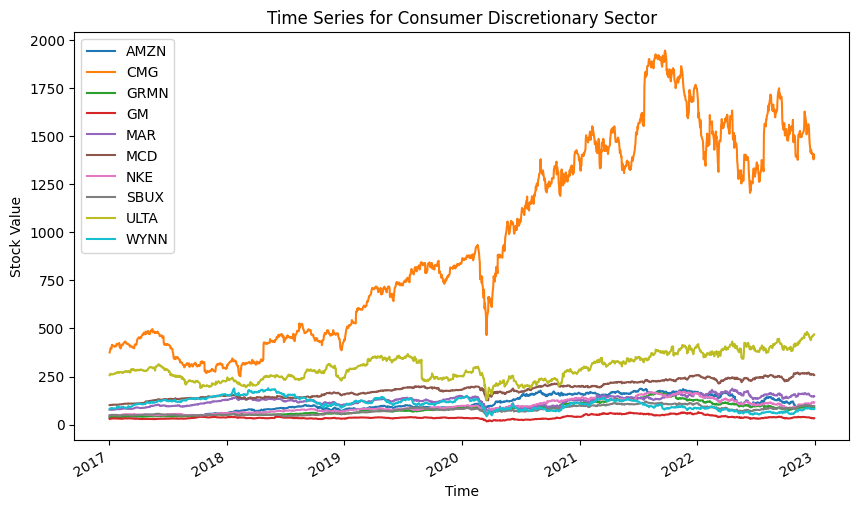

In [ ]:
# Plot the time series for the second 10 stocks, Consumer Discretionary
plt.figure(figsize=(10, 6))
consumer_data.plot(ax=plt.gca())
plt.title('Time Series for Consumer Discretionary Sector')
plt.xlabel('Time')
plt.ylabel('Stock Value')
plt.legend(loc='upper left')
plt.show()

In this visualization of the Consumer Discretionary sector, it is difficult to see what is happening in for all of the stocks, since the scale for CMG (Chipotle Mexican Grill) is so different from the others.

It is clear from this plot, though, that CMG has had great success. The end of 2021 was a particularly successful period of time. Overall, other than a dip in 2020, CMG appears to have more than tripled in value since 2017.

We will plot this sector again, excluding CMG, to be able to visualize the other stocks with more granularity.

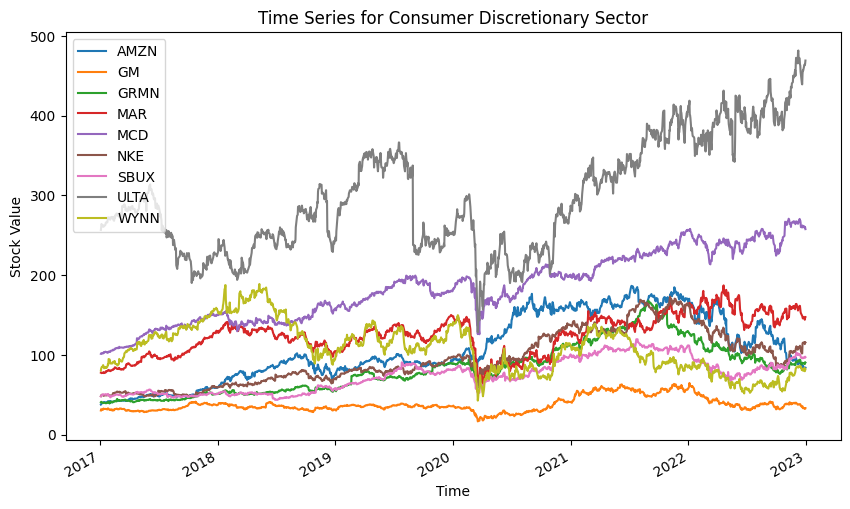

In [ ]:
# Subset the second 10 stocks, consumer discretionary, except for CMG
consumer_except_CMG = consumer_data[consumer_data.columns.difference(['CMG'])]

# Plot the time series for the second 10 stocks, consumer discretionary, except for CMG
plt.figure(figsize=(10, 6))
consumer_except_CMG.plot(ax=plt.gca())
plt.title('Time Series for Consumer Discretionary Sector')
plt.xlabel('Time')
plt.ylabel('Stock Value')
plt.legend(loc='upper left')
plt.show()

This visualization shows the remaining portfolio of Consumer Discretionary  stocks in greater detail. Similar to the Materials sector, there is a significant dip in 2020.

Aside from CMG (previously mentioned) and ULTA (Ulta Beauty), this sector is a bit more unchanging than the Materials sector. Most of the stocks remain at approximately the same value value from 2017 through 2022.

ULTA and WYNN (Wynn Resorts) seem to be the most volatile, or inconsistent, across time.

MCD (McDonald's), on the contrary, seems to have been very stable over the years, with a consistent upward trend.

### Industrials Sector, 2017-2022

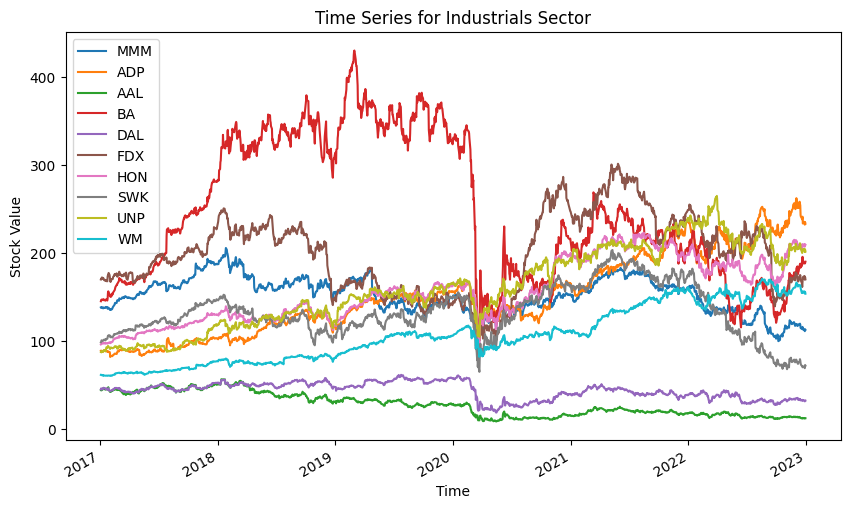

In [ ]:
# Plot the time series for the last 10 stocks, Industrials
plt.figure(figsize=(10, 6))
industrials_data.plot(ax=plt.gca())
plt.title('Time Series for Industrials Sector')
plt.xlabel('Time')
plt.ylabel('Stock Value')
plt.legend(loc='upper left')
plt.show()

This visualization shows a variety of activities. Most notable within the bunch, BA (Boeing) was doing very well until the 2020 crash, and has since been unable to fully recovery.

The airline stocks, AAL (American Airlines Group) and DAL (Delta Air Lines), show stable declines over the years. A few other stocks show similar declines from the start of 2017 to the end of 2022, with a bit more variability across that span.

While difficult to see in this plot due to the variations between stocks, it is noteworthy that ADP (ADP), UNP (Union Pacific Corporation), and WM (Waste Management) all show decent stability and positive movement across these years.

# 2-Momentum Trading for Stock Selection

## Import Data

The following blocks of code define and implement a function that imports the full stock market data, and then applies the 8-21 Momentum Trading Strategy to each selected stock.

This code involves a function that pulls the same data for each stock in the portfolio. It creates a list of trading days from the beginning of 2017 to the end of 2022, and organizes columns to hold data on daily opening, high, low, and closing prices for the respective stock. Additional columns calculate the 8-day and 21-day moving averages, as well as the stock's returns. The code also drops missing or null values.

This same function applies the Momentum Trading Strategy. When the 8-day moving average is greater than the 21-day moving average, this triggers a 'Buy' operation (the status changes from not invested in the stock to invested). On the contrary, when the 8-day moving average is less than the 21-day moving average, this triggers a 'Sell' operation (the status changes from invested to not invested). When the status of a stock is invested, the return from that stock changes.



In [ ]:
# Function to fetch historical stock data for a given ticker
def fetch_stock_data(ticker):
    stock_data = si.get_data(ticker,start_date = '01/01/2017',end_date='01/01/2023',interval='1d')
    # Generate list of trading days
    day = np.arange(1, len(stock_data) + 1)
    stock_data['Day'] = day
    # Reorganizing the columns
    stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
    # Renaming the columns
    stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']
    # Calculate 8-day and 21-day moving averages
    stock_data['8-day'] = stock_data['Close'].rolling(8).mean().shift()
    stock_data['21-day'] = stock_data['Close'].rolling(21).mean().shift()

    # Calculate log returns
    stock_data['logClose'] = np.log(stock_data['Close'])
    stock_data['return'] = stock_data['logClose'].diff()
    stock_data.dropna(inplace=True)

    # Apply the momentum trading strategy
    # Invested column to show whether we are currently investing money or if we are out of the market (invested = 1 if the 8-day average is greater than the 21-day average)
    stock_data['invested'] = np.where(stock_data['8-day'] > stock_data['21-day'], 1, 0)
    # Signal column to indicate changes / transition points (leaving or entering the market based on the momentum trading strategy)
    stock_data['signal'] = stock_data['invested'].diff()
    # Set signal = 1.0 when 'invested' = 1, and 0 when 'invested' = 0 on the first trading day
    stock_data.loc["2017-02-02", 'signal'] = np.where(stock_data.loc["2017-02-02", 'invested'] == 1, 1.0, 0)
    # See the return (only changes when invested = 1)
    stock_data['system_return'] = stock_data['invested'] * stock_data['return']
    return stock_data

In [ ]:
# Create a dictionary to store DataFrames for each ticker
all_tickers_data = {}

# Fetch and process data for each ticker in the list of selected stocks
for ticker in tickers_list:
    stock_data = fetch_stock_data(ticker)
    all_tickers_data[ticker] = stock_data

# Display the resulting DataFrames for each ticker
# for ticker, stock_data in all_tickers_data.items():
#     print(f"\n{ticker} DataFrame:")
#     print(stock_data.head(-5))

<ipython-input-139-d1e08380a3cf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['8-day'] = stock_data['Close'].rolling(8).mean().shift()


### Segment Data into Sectors

The following three blocks of code segment the data that was imported in the previous section.

Each block creates a DataFrame for a specified sector, incorporating daily data from the year 2021, so that the data can be easily plotted in the following section.

In [ ]:
# Materials Sector
# Create a dictionary to store DataFrames for each stock in the Materials sector
materials_sector_data = {}

# Iterate through each stock and apply the 8-day and 21-day moving averages along with the trading strategy
for stock_ticker in tickers_materials:
    # Fetch historical stock data for the current stock ticker
    stock_data = fetch_stock_data(stock_ticker)

    # Filter data for the year 2021
    stock_data_2021 = stock_data[(stock_data.index >= '2021-01-01') & (stock_data.index <= '2021-12-31')]

    # Store the resulting DataFrame in the dictionary
    materials_sector_data[stock_ticker] = stock_data_2021

In [ ]:
# Consumer Discretionary sector
# Create a dictionary to store DataFrames for each stock in the Consumer Discretionary sector
consumer_sector_data = {}

# Iterate through each stock and apply the 8-day and 21-day moving averages along with the trading strategy
for stock_ticker in tickers_consumer:
    # Fetch historical stock data for the current stock ticker
    stock_data = fetch_stock_data(stock_ticker)

    # Filter data for the year 2021
    stock_data_2021 = stock_data[(stock_data.index >= '2021-01-01') & (stock_data.index <= '2021-12-31')]

    # Store the resulting DataFrame in the dictionary
    consumer_sector_data[stock_ticker] = stock_data_2021

In [ ]:
# Industrials sector
# Create a dictionary to store DataFrames for each stock in the Industrials sector
industrials_sector_data = {}

# Iterate through each stock and apply the 8-day and 21-day moving averages along with the trading strategy
for stock_ticker in tickers_industrials:
    # Fetch historical stock data for the current stock ticker
    stock_data = fetch_stock_data(stock_ticker)

    # Filter data for the year 2021
    stock_data_2021 = stock_data[(stock_data.index >= '2021-01-01') & (stock_data.index <= '2021-12-31')]

    # Store the resulting DataFrame in the dictionary
    industrials_sector_data[stock_ticker] = stock_data_2021

## Momentum Trading Plots

### Create Plot Functions

The following blocks of code create two functions:

1. The first function plots the cumulative system return by sector, across time. It shows the performance of the 8-21 Momentum Trading Strategy for each stock in the given sector. In other words, this plot shows how the investment in each stock changed over time.

2. The second function plots the decisions made using the 8-21 Momentum Trading Strategy over time, for the given sector. It shows the actual prices of the stocks, and the points in time at which there is a change in investment (either 'Buy' or 'Sell'). These changes indicate when the 8-day moving average is greater than the 21-day moving average, and when the 8-day moving average is less than the 21-day moving average, respectively.

In [ ]:
# Function 1 - Cumulative System Return by Sector
def plot_cumulative_return(sector_data, sector_name):
    plt.figure(figsize=(10, 6))
    plt.title(f"{sector_name} - Cumulative Returns per Stock")
    plt.xlabel("Date")
    plt.ylabel("Cumulative System Return")

    # Plot the performance for each stock in the given sector
    for stock_ticker, stock_data in sector_data.items():
        plt.plot(stock_data.index, stock_data['system_return'].cumsum(), label=stock_ticker)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

In [ ]:
# Function 2 - 8-21 Momentum Trading Strategy for a given sector (with Buy & Sell signal)
def plot_investment_strategy(sector_data, sector_name):
    plt.figure(figsize=(10, 6))
    plt.title(f"{sector_name} - Buy and Sell Signals")
    plt.xlabel("Date")
    plt.ylabel("Stock Value")

    handles_list = []
    labels_list = []

    for stock_ticker, stock_data in sector_data.items():
        # Plot actual stock prices
        stock_line, = plt.plot(stock_data.index, stock_data['Close'], linestyle='--')
        handles_list.append(stock_line)
        labels_list.append(f"{stock_ticker} - Actual Price")

        # Plot trading signals (either 'Buy' or 'Sell')
        buy_signals = stock_data[stock_data['signal'] == 1]
        sell_signals = stock_data[stock_data['signal'] == -1]
        buy_marker = plt.scatter(buy_signals.index, buy_signals['8-day'], marker='^', color='g', label='Buy Signal')
        sell_marker = plt.scatter(sell_signals.index, sell_signals['21-day'], marker='v', color='r', label='Sell Signal')

    handles_list += [buy_marker, sell_marker]
    labels_list += ['Buy Signal', 'Sell Signal']

    plt.legend(handles_list, labels_list, loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

### Materials Sector, 2021


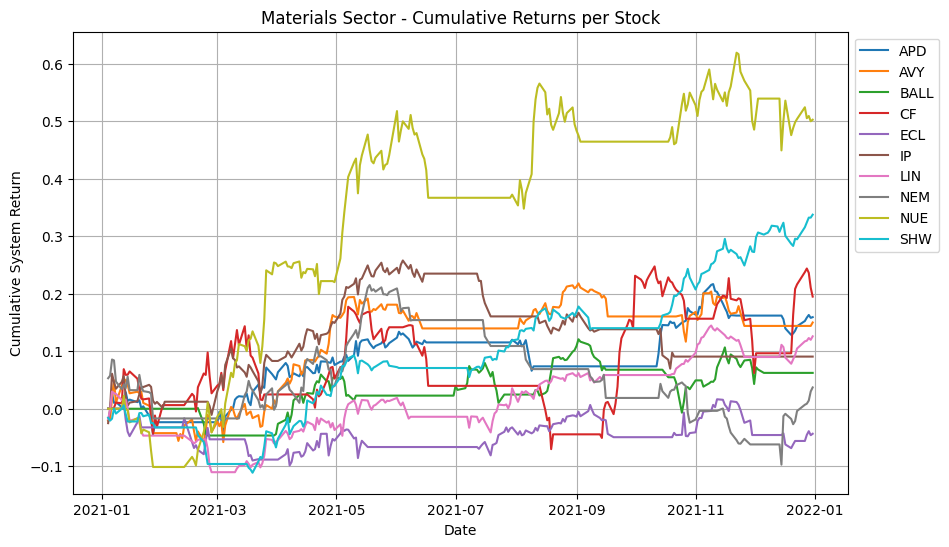

In [ ]:
# Plot Cumulative System Return by Sector for the Materials sector
plot_cumulative_return(materials_sector_data, "Materials Sector")

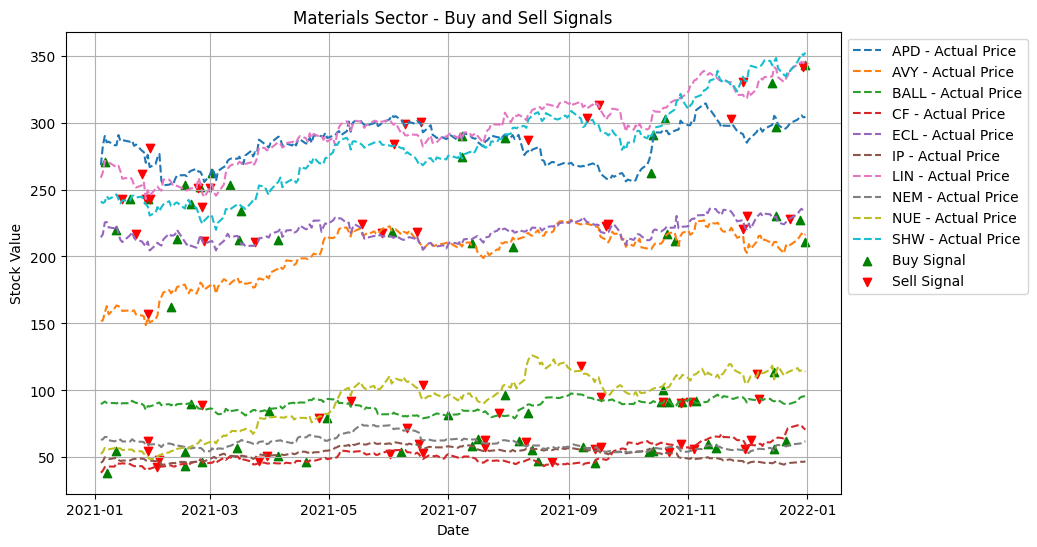

In [ ]:
# Plot 8-21 Momentum Trading Strategy decisions for the Materials sector
plot_investment_strategy(materials_sector_data, "Materials Sector")

### Consumer Discretionary Sector, 2021

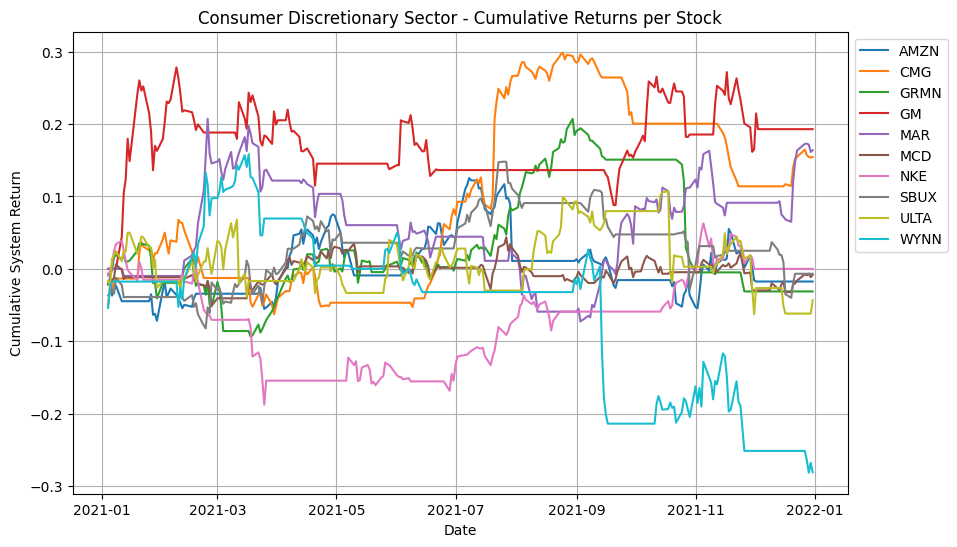

In [ ]:
# Plot Cumulative System Return by Sector for the Consumer Discretionary sector
plot_cumulative_return(consumer_sector_data, "Consumer Discretionary Sector")

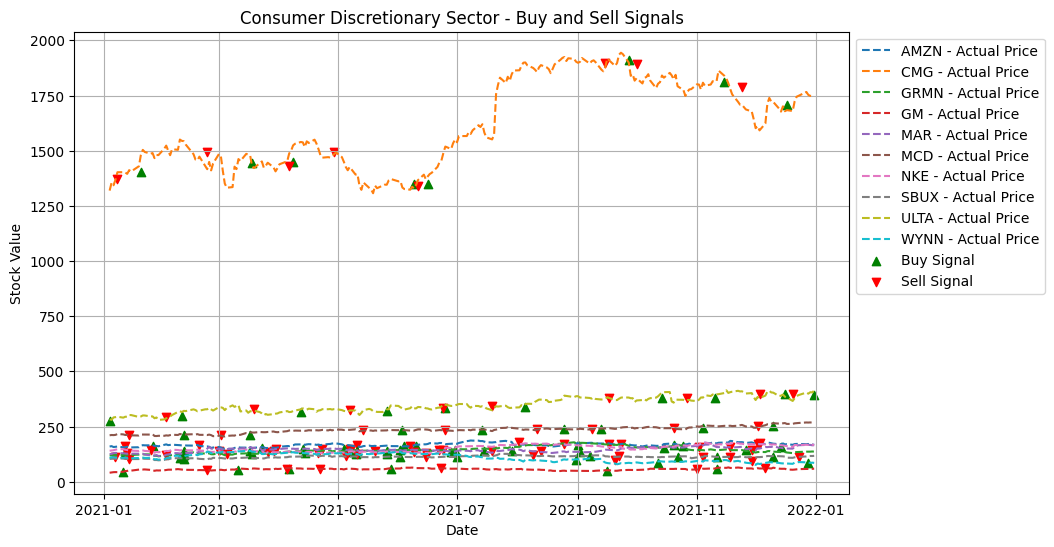

In [ ]:
# Plot 8-21 Momentum Trading Strategy decisions for the Consumer Discretionary sector
plot_investment_strategy(consumer_sector_data, "Consumer Discretionary Sector")

### Industrials Sector, 2021

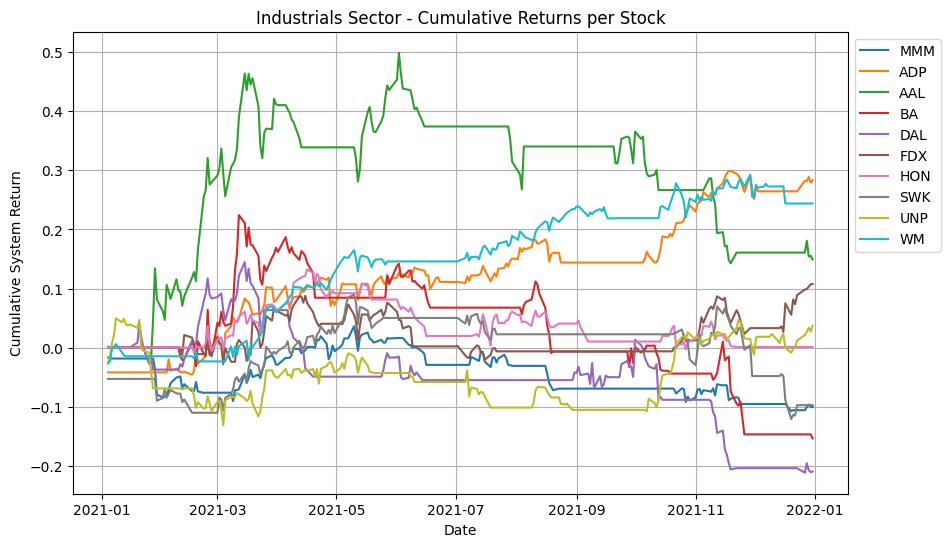

In [ ]:
# Plot Cumulative System Return by Sector for the Industrials sector
plot_cumulative_return(industrials_sector_data, "Industrials Sector")

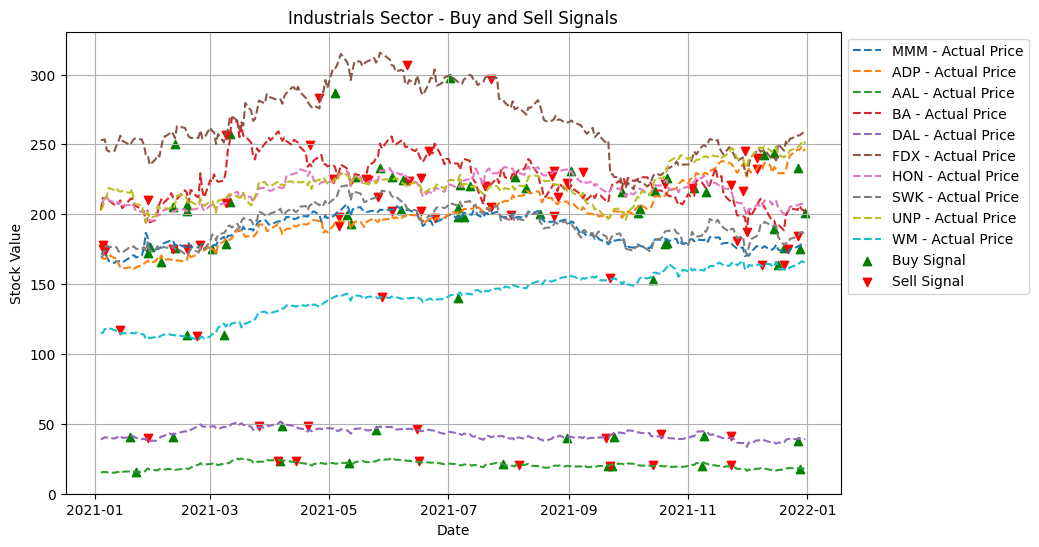

In [ ]:
# Plot 8-21 Momentum Trading Strategy decisions for the Industrials sector
plot_investment_strategy(industrials_sector_data, "Industrials Sector")

## Best-Performing Stocks

In [ ]:
# Function to identify the three best-performing stocks for a given sector
def identify_top_performers(sector_data, sector_name):
    print(f"\nThree Best-Performing Stocks in {sector_name} Sector:")

    # Create a dictionary to store the total system return for each stock
    total_returns = {}

    for stock_ticker, stock_data in sector_data.items():
        # Calculate the total system return for each stock
        total_return = np.exp(np.sum(stock_data['system_return'])) - 1
        total_returns[stock_ticker] = total_return

    # Identify and print the three best-performing stocks
    top_three_stocks = sorted(total_returns, key=total_returns.get, reverse=True)[:3]
    for rank, stock_ticker in enumerate(top_three_stocks, start=1):
        print(f"{rank}. {stock_ticker}: Total Return - {total_returns[stock_ticker]}")

# Identify and print three best-performing stocks, and their respective total returns, for each sector
identify_top_performers(materials_sector_data, "Materials")
identify_top_performers(consumer_sector_data, "Consumer")
identify_top_performers(industrials_sector_data, "Industrials")


Three Best-Performing Stocks in Materials Sector:
1. NUE: Total Return - 0.6525903562470301
2. SHW: Total Return - 0.40116179538168484
3. CF: Total Return - 0.21522725477705285

Three Best-Performing Stocks in Consumer Sector:
1. GM: Total Return - 0.2127605242776205
2. MAR: Total Return - 0.17791561920451948
3. CMG: Total Return - 0.16694300492723557

Three Best-Performing Stocks in Industrials Sector:
1. ADP: Total Return - 0.32742292033992393
2. WM: Total Return - 0.2761392180078217
3. AAL: Total Return - 0.16080998966138838


## Momentum Trading Conclusions

According to the 8-21 Momentum Trading Strategy, the three best-performing stocks of each sector are as follows.

>Materials Sector:

    1. NUE - Nucor
    2. SHW - Sherwin-Williams
    3. CF - CF Industries

These three stocks make sense considering the initial visualization. Each of these displayed strong upward progress from in 2021. In the Momentum Trading plots, it is clear that NUE had consistently positive returns. Instead, the trends for SHW and CF were a bit more unstable. CF in particular was quite up and down, and trended around the other stocks in the sector. Only at the end of the year did it squeeze out a performance to pull it ahead of the other stocks in the group.


>Consumer Discretionary Sector:

    1. GM - General Motors
    2. MAR - Marriot International
    3. CMG - Chipotle Mexican Grill

In the Consumer Discretionary Sector, it is not surprising that CMG was one of the higher performers. All of the plots show its high value and consistent increases. Though less apparent on the plots, GM and MAR also have shown steady increases over time.

>Industrials Sector:

    1. ADP - ADP
    2. WM - Waste Management
    3. AAL - American Airlines Group

Both ADP and WM are reasonable top performers, considering the initial visualization. They showed strong, positive growth across all of the years included in the plot. AAL, on the other hand, displayed a downward trend, globally across the plot. In the year of 2021, there was a slight local increase, which would explain the status as a top performer in this year. The Momentum Trading plot even shows some of this general downward activity, which may not bode well for having AAL in the portfolio.

# 3-Modern Portfolio Theory

## Extract Identified Stocks

The following code extracts a list of the three best-performing stocks for each sector, based on the 8-21 Momentum Trading Strategy used on stock data from 2021.

In [ ]:
#Extract list of top 3 stocks per sector
def identify_top_performers(sector_data, sector_name):
    # Create a dictionary to store the total system return for each stock
    total_returns = {}

    for stock_ticker, stock_data in sector_data.items():
        # Calculate the total system return for each stock
        total_return = np.exp(np.sum(stock_data['system_return'])) - 1
        total_returns[stock_ticker] = total_return

    # Identify the three best-performing stocks
    top_three_stocks = sorted(total_returns, key=total_returns.get, reverse=True)[:3]
    for rank, stock_ticker in enumerate(top_three_stocks, start=1):
        # Return the top-three performing stocks
        return top_three_stocks

# Call the function to identify the three best-performing stocks for each sector
top_materials_stocks = identify_top_performers(materials_sector_data, "Materials")
top_consumer_stocks = identify_top_performers(consumer_sector_data, "Consumer")
top_industrials_stocks = identify_top_performers(industrials_sector_data, "Industrials")

# Display the lists of the three best-performing stocks in each sector
print("\nTop Materials Stocks:", top_materials_stocks)
print("Top Consumer Stocks:", top_consumer_stocks)
print("Top Industrials Stocks:", top_industrials_stocks)

# Display the list of all nine stocks in this group
all_top_stocks_tickers = top_materials_stocks + top_consumer_stocks + top_industrials_stocks
print("Complete List of Top Stocks in each Sector:", all_top_stocks_tickers)


Top Materials Stocks: ['NUE', 'SHW', 'CF']
Top Consumer Stocks: ['GM', 'MAR', 'CMG']
Top Industrials Stocks: ['ADP', 'WM', 'AAL']
Complete List of Top Stocks in each Sector: ['NUE', 'SHW', 'CF', 'GM', 'MAR', 'CMG', 'ADP', 'WM', 'AAL']


##2017-2021 Returns

In [ ]:
# Create empty DataFrame to store the 'system_return' values for each ticker
returns_df = pd.DataFrame()

# Get the return value for each ticker in the list of top nine stocks selected in the 8-21 Momentum Trading strategy (all_top_stocks)
for ticker in all_top_stocks_tickers:
    stock_data = fetch_stock_data(ticker)

    # Filter stock_data for the years 2017-2021 for training
    stock_data = stock_data[(stock_data.index >= '2017-01-01') & (stock_data.index <= '2021-12-31')]

    # Add a column to the DataFrame for the returns from each stock
    returns_df[ticker] = stock_data['return']

# Display the resulting DataFrame
print("Return Values DataFrame:")
returns_df

Return Values DataFrame:


,NUE,SHW,CF,GM,MAR,CMG,ADP,WM,AAL
2017-02-02,0.009789,-0.007606,-0.027680,-0.011410,-0.001655,0.007279,0.011171,0.006627,-0.000908
2017-02-03,-0.002438,0.000461,0.001402,0.016653,0.011180,-0.046468,0.005694,0.000144,0.004308
2017-02-06,0.008681,-0.006700,-0.005339,0.013669,0.002338,-0.021235,-0.004138,-0.003308,0.024582
2017-02-07,-0.003463,0.000265,-0.017051,-0.048112,0.001866,0.007680,-0.001868,0.006891,-0.002874
2017-02-08,0.010869,0.010899,0.001432,0.001139,0.006389,0.010729,0.003007,0.001572,-0.002438
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.020351,0.020968,0.021347,0.009096,0.009159,0.009997,0.017572,0.011359,-0.004941
2021-12-28,-0.019040,0.008214,0.006209,-0.005588,0.000240,-0.007576,-0.000894,0.008209,0.020159
2021-12-29,0.003837,0.008460,-0.007563,0.002099,-0.001200,-0.002462,0.007853,0.007481,-0.026785
2021-12-30,-0.009093,-0.002850,-0.025819,0.015604,-0.010199,-0.000790,-0.009928,-0.003914,0.001107


###Covariance and Correlation Matrices

In [ ]:
# Plot the covariance matrix to see how the stocks vary together
covariance_matrix = returns_df.cov()
print('Covariance Matrix:')
covariance_matrix

Covariance Matrix:


,NUE,SHW,CF,GM,MAR,CMG,ADP,WM,AAL
NUE,0.000502,0.000170,0.000334,0.000295,0.000252,0.000126,0.000189,0.000127,0.000317
SHW,0.000170,0.000275,0.000172,0.000171,0.000143,0.000135,0.000161,0.000112,0.000139
CF,0.000334,0.000172,0.000668,0.000323,0.000294,0.000144,0.000202,0.000123,0.000383
GM,0.000295,0.000171,0.000323,0.000583,0.000336,0.000166,0.000194,0.000123,0.000461
MAR,0.000252,0.000143,0.000294,0.000336,0.000553,0.000194,0.000181,0.000109,0.000518
CMG,0.000126,0.000135,0.000144,0.000166,0.000194,0.000533,0.000133,0.000085,0.000160
ADP,0.000189,0.000161,0.000202,0.000194,0.000181,0.000133,0.000290,0.000140,0.000223
WM,0.000127,0.000112,0.000123,0.000123,0.000109,0.000085,0.000140,0.000173,0.000136
AAL,0.000317,0.000139,0.000383,0.000461,0.000518,0.000160,0.000223,0.000136,0.001294


In [ ]:
# Plot the correlation matrix
# correlation_matrix = returns_df.corr()
# correlation_matrix

###Average Return and Standard Deviation

In [ ]:
# Create the average return for each stock
# Will be used for objective function coefficients
df_avg_return = returns_df.mean()

# Calculate the standard deviation for each stock
df_stdev_return = np.std(returns_df)

# Create a DataFrame with the average return and standard deviation for each stock
df_return = pd.DataFrame({'Stock Ticker': df_avg_return.index,
                          'Average Return': df_avg_return.values,
                          'St. Dev': df_stdev_return.values})
df_return

,Stock Ticker,Average Return,St. Dev
0,NUE,0.000562,0.022399
1,SHW,0.001000,0.016579
2,CF,0.000532,0.025832
3,GM,0.000391,0.024137
4,MAR,0.000540,0.023498
5,CMG,0.001152,0.023079
6,ADP,0.000768,0.017034
7,WM,0.000711,0.013140
8,AAL,-0.000725,0.035953


##Optimization Model

### Import Solver

In [ ]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'

Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 201MB/s]


In [ ]:
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # Using the IPOPT Solver
except:
    pass

###Objective & Constraints

In the following block of code, we specify the ConcreteModel for the optimization model.

Then we specify our decision variables, one for each stock.

In [ ]:
from pyomo.environ import *

m = ConcreteModel()

# Defining each stock variable
# Setting lower bound to None since there should be none, upper bound is 100%

# Material top stocks
m.NUE = Var(within=NonNegativeReals, bounds=(None, 1))
m.SHW = Var(within=NonNegativeReals, bounds=(None, 1))
m.CF = Var(within=NonNegativeReals, bounds=(None, 1))

# Consumer Discretionary top stocks
m.CMG = Var(within=NonNegativeReals, bounds=(None, 1))
m.GM = Var(within=NonNegativeReals, bounds=(None, 1))
m.MAR = Var(within=NonNegativeReals, bounds=(None, 1))

# Industrials top stocks
m.ADP = Var(within=NonNegativeReals, bounds=(None, 1))
m.WM = Var(within=NonNegativeReals, bounds=(None, 1))
m.AAL = Var(within=NonNegativeReals, bounds=(None, 1))

Next, we declare the objective function for the optimization problem. We want to **maximize our returns** to make as much money as possible from our portfolio.

We also specify the constraints on our model. One is that the amount we invest in the portfolio needs to sum to '1' or 100%.

In [ ]:
# Declare objective
m.objective = Objective(expr =
                        # Materials sector
                        m.NUE * df_avg_return['NUE'] + m.SHW * df_avg_return['SHW'] + m.CF * df_avg_return['CF'] +
                        # Consumer Discretionary sector
                        m.CMG * df_avg_return['CMG'] + m.GM * df_avg_return['GM'] + m.MAR * df_avg_return['MAR'] +
                        # Industrials sector
                        m.ADP * df_avg_return['ADP'] + m.WM * df_avg_return['WM'] + m.AAL * df_avg_return['AAL'],
                        sense=maximize)

top_stock_list = [m.NUE, m.SHW, m.CF, m.CMG, m.GM, m.MAR, m.ADP, m.WM, m.AAL]

# Declare constraints
# Sum of all porportions = 1
m.sum_proportions = Constraint(expr = sum(top_stock_list) == 1)

# Set maximum risk
m.total_risk = Constraint(expr = sum(top_stock_list) >= 0.0)

###Risk Calculation

Generate a sequence of 100 risk levels to consider in our model.

In [ ]:
# Create calculations table to calculate the risk
# Calculate risk
def calc_risk(m):
  variables = top_stock_list
  # Use all nine stocks in the portfolio
  tickers = all_top_stocks_tickers
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*covariance_matrix.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# Use this expression to compute the risk
expr_risk = calc_risk(m)

# Set the maximum risk to be less than 0.00075
max_risk = 0.00075

# Generae a sequence of 100 risk levels
risk_levels = np.linspace(0.000001, max_risk, 100)
# risk_levels

###Run the Model

Run the portfolio allocation model for the 100 generated risk levels, using the nine stocks selected in the previous step (Momentum Trading).

This also filters out infeasible solutions.

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# Update the risk constraint for each level and then solve the problem
param_analysis = {} # key=risk, value = stock allocations
returns = {} # key=risk, value = return

for r in risk_levels:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # Run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # Checks if solution is not optimal/infeasible
  if result.solver.termination_condition != TerminationCondition.optimal:
    continue

  result = result.write()

  # Store allocation proportions
  param_analysis[r] = [m.NUE(), m.SHW(), m.CF(), m.CMG(), m.GM(), m.MAR(), m.ADP(), m.WM(), m.AAL()]

  # Store returns
  # returns[r] = m.objective()
  returns[r] = (
        m.NUE() * df_avg_return['NUE'] + m.SHW() * df_avg_return['SHW'] + m.CF() * df_avg_return['CF'] +
        m.CMG() * df_avg_return['CMG'] + m.GM() * df_avg_return['GM'] + m.MAR() * df_avg_return['MAR'] +
        m.ADP() * df_avg_return['ADP'] + m.WM() * df_avg_return['WM'] + m.AAL() * df_avg_return['AAL']
        )

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally in

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01114344596862793
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# =====

##Modern Portfolio Theory Plots

###Optimal Stock Allocation for Different Risk Levels

The following plot shows how the allocation into different stocks will vary for different risk levels.

On the lefthand side, there is low risk and higher diversity. On the righthand side, there is higher risk and lower diversity. Eventually, the efficient frontier reaches a plateau.

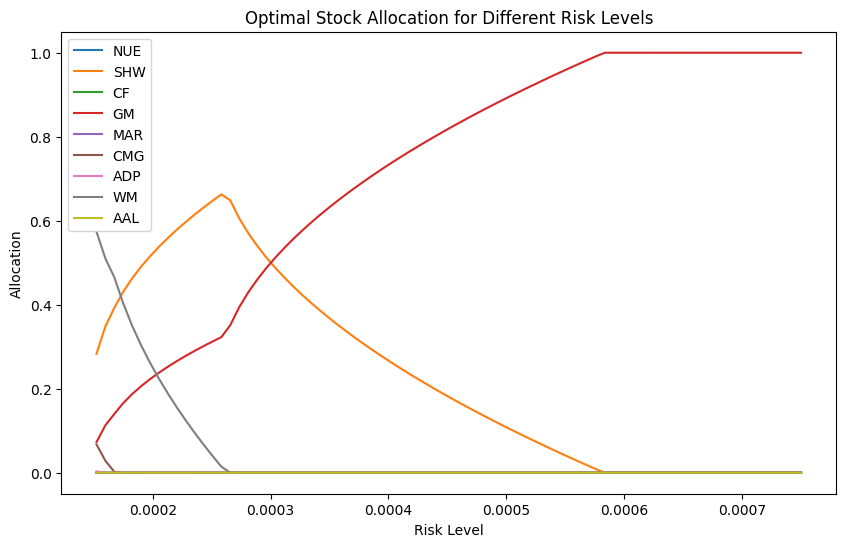

In [ ]:
# Generate the DataFrame for proportions of the portfolio at each risk level
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['NUE', 'SHW', 'CF', 'GM', 'MAR', 'CMG', 'ADP', 'WM', 'AAL'] # all_top_stocks_tickers
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
xlabel('Risk Level')
ylabel('Allocation')
plt.show()

###Efficient Frontier

In [ ]:
# Subset so that we can look at the efficient frontier
risk = list(returns.keys()) # Coerce dict_keys to a list
print(risk)

reward = list(returns.values()) # Coerce dict_values to a list
print(reward)

[0.00015231313131313132, 0.0001598787878787879, 0.00016744444444444445, 0.00017501010101010102, 0.00018257575757575758, 0.00019014141414141415, 0.00019770707070707071, 0.00020527272727272728, 0.00021283838383838384, 0.0002204040404040404, 0.00022796969696969697, 0.00023553535353535354, 0.0002431010101010101, 0.0002506666666666667, 0.0002582323232323233, 0.00026579797979797985, 0.0002733636363636364, 0.000280929292929293, 0.00028849494949494955, 0.0002960606060606061, 0.0003036262626262627, 0.00031119191919191924, 0.0003187575757575758, 0.0003263232323232324, 0.00033388888888888894, 0.0003414545454545455, 0.00034902020202020207, 0.00035658585858585863, 0.0003641515151515152, 0.00037171717171717176, 0.00037928282828282833, 0.0003868484848484849, 0.00039441414141414146, 0.000401979797979798, 0.0004095454545454546, 0.00041711111111111115, 0.0004246767676767677, 0.0004322424242424243, 0.00043980808080808085, 0.0004473737373737374, 0.000454939393939394, 0.00046250505050505054, 0.000470070707

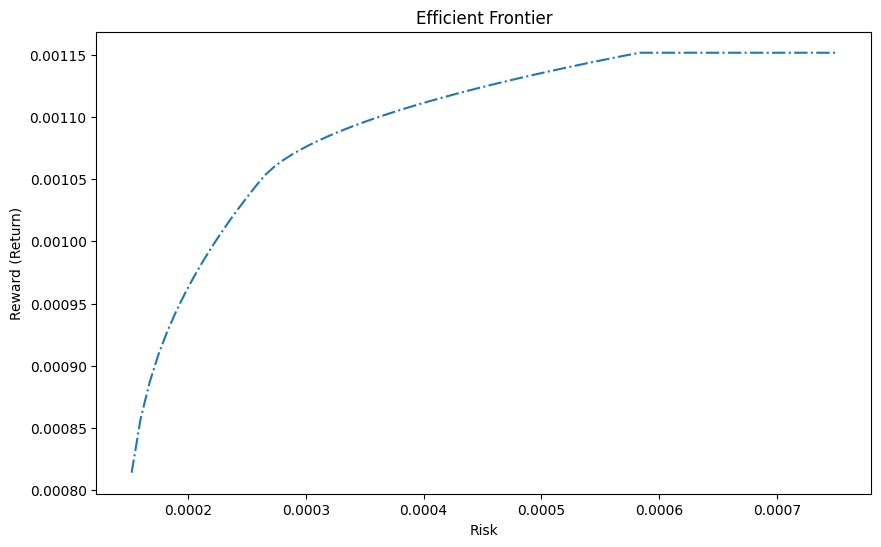

In [ ]:
# Plotting risk against reward to show the efficient frontier
from pylab import *
plot(risk, reward, '-.')
title('Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

After a certain point, taking on more risk does not increase the returns. This occurs at around Risk = 0.0006, which achieves a max return of about 0.00115.

Any point on the efficient frontier is an optimal allocation, based on individual risk tolerance.

## Select Stocks

In [ ]:
index = param_analysis.index[param_analysis.eq(0.0006).any(axis=1)]

# Create a DataFrame using the stored allocation proportions
df = param_analysis
# Change the index
df = df.reset_index().rename(columns={"index": "risk"})

df.loc[58]

risk    0.000591
NUE     0.000005
SHW     0.000023
CF      0.000004
GM      0.999945
MAR     0.000003
CMG     0.000004
ADP     0.000007
WM      0.000006
AAL     0.000001
Name: 58, dtype: float64

In [ ]:
# Print the stock allocation when the risk level = 0.0006
print(f"Stock Allocation at Risk = 0.000600:")
print(f"GM: {df.loc[59, 'GM']:.5f}")
print(f"SHW: {df.loc[59, 'SHW']:.5f}")
print(f"WM: {df.loc[59, 'WM']:.5f}")

Stock Allocation at Risk = 0.000600:
GM: 0.99994
SHW: 0.00002
WM: 0.00001


From the results of the optimization model, we select the portfolio allocation for the risk level = 0.0006. This allocation contains the following three stocks:

    GM - General Motors
    SHW - Sherwin-Williams
    WM - Waste Management

These stocks will be used in the next section.

# 4-Analysis

In this section, we apply several investment strategies to 2022.

We assume we have $100,000 to invest.

## Buy-and-Hold strategy for the MPT Portfolio

In this investment, we use the Buy-and-Hold strategy on the previously selected portfolio.

Based on the results of the Modern Portfolio Theory optimization model, We allocate the following optimal amounts for the three selected stocks (CM, SHW, and WM) at risk level = 0.0006:
>
    GM: 0.99994
    SHW: 0.00002
    WM: 0.00001

We store these allocation amounts in individual variables (gm_allocation_amt, shw_allocation_amt, and wm_allocation_amt).

In [ ]:
# Extract the allocation amount for each of the three selected stocks
gm_allocation_amt = df.loc[59]['GM']
shw_allocation_amt = df.loc[59]['SHW']
wm_allocation_amt = df.loc[59]['WM']

In [ ]:
# Materials Sector
# Create a dictionary to store DataFrames for each stock in the Materials sector
materials_sector_data = {}

# Iterate through each stock and apply the 8-day and 21-day moving averages along with the trading strategy
for stock_ticker in tickers_materials:
    # Fetch historical stock data for the current stock ticker
    stock_data = fetch_stock_data(stock_ticker)

    # Filter data for the year 2021
    stock_data_2021 = stock_data[(stock_data.index >= '2021-12-01') & (stock_data.index <= '2022-12-01')]

    # Store the resulting DataFrame in the dictionary
    materials_sector_data[stock_ticker] = stock_data_2021

In [ ]:
# Consumer Discretionary Sector
# Create a dictionary to store DataFrames for each stock in the Consumer Discretionary sector
consumer_sector_data = {}

# Iterate through each stock and apply the 8-day and 21-day moving averages along with the trading strategy
for stock_ticker in tickers_consumer:
    # Fetch historical stock data for the current stock ticker
    stock_data = fetch_stock_data(stock_ticker)

    # Filter data for the year 2021
    stock_data_2021 = stock_data[(stock_data.index >= '2021-12-01') & (stock_data.index <= '2022-12-01')]

    # Store the resulting DataFrame in the dictionary
    consumer_sector_data[stock_ticker] = stock_data_2021

In [ ]:
# Industrials Sector
# Create a dictionary to store DataFrames for each stock in the Industrials sector
industrials_sector_data = {}

# Iterate through each stock and apply the 8-day and 21-day moving averages along with the trading strategy
for stock_ticker in tickers_industrials:
    # Fetch historical stock data for the current stock ticker
    stock_data = fetch_stock_data(stock_ticker)

    # Filter data for the year 2021
    stock_data_2021 = stock_data[(stock_data.index >= '2021-12-01') & (stock_data.index <= '2022-12-01')]

    # Store the resulting DataFrame in the dictionary
    industrials_sector_data[stock_ticker] = stock_data_2021

Apply a different date range for each sector.

In [ ]:
import pandas as pd

# Given dictionaries for each stock: consumer_sector_data, materials_sector_data, industrials_sector_data
stock_data_list = [consumer_sector_data['GM'], materials_sector_data['SHW'], industrials_sector_data['WM']]

# Given the allocation amounts and investment amount
allocation_amounts = {'GM': gm_allocation_amt, 'SHW': shw_allocation_amt, 'WM': wm_allocation_amt}
investment_amount = 100000

# Initialize an empty DataFrame to store the investment values
investment_df = pd.DataFrame()

# Iterate over each stock in the DataFrame
for stock_name, stock_data in zip(allocation_amounts.keys(), stock_data_list):

    # Ensure that stock_data covers the desired date range
    stock_data = stock_data.loc['2022-01-01':'2022-12-01']

    # Calculate the number of shares for each stock based on the allocation amount
    shares = allocation_amounts[stock_name] * investment_amount / stock_data['Close'].iloc[0]

    # Create a DataFrame with the first day of each month as the index
    monthly_index = pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS')
    monthly_investment_df = pd.DataFrame(index=monthly_index)

    # Calculate the investment value for the first day of each month
    monthly_investment_df[f'Investment_{stock_name}'] = shares * stock_data['Close'].resample('MS').first()

    # Concatenate the monthly investment DataFrame to the overall investment DataFrame
    investment_df = pd.concat([investment_df, monthly_investment_df], axis=1)

# Add an 'Aggregate Investment Value' column
investment_df['Aggregate Investment Value'] = investment_df.sum(axis=1)

investment_df

,Investment_GM,Investment_SHW,Investment_WM,Aggregate Investment Value
2022-01-01,99994.466525,2.315586,0.642327,99997.424438
2022-02-01,88388.114048,2.001283,0.591096,88390.706427
2022-03-01,72776.750510,1.744815,0.578545,72779.073870
2022-04-01,70226.619568,1.742630,0.630763,70228.992960
2022-05-01,62854.134858,1.835289,0.627724,62856.597870
2022-06-01,62559.888740,1.811253,0.625711,62562.325704
2022-07-01,52620.922617,1.606202,0.614343,52623.143162
2022-08-01,60107.841915,1.659872,0.644774,60110.146561
2022-09-01,63033.952623,1.586400,0.671140,63036.210163
2022-10-01,53732.517676,1.463834,0.651603,53734.633113


The table illustrates the monthly investment values for each of the three stocks in our portfolio (GM, SHW, and WM) on the first day of each month, along with an aggregate investment value of the entire portfolio, starting with an initial investment of $100,000.

As our portfolio is significantly reliant on GM, the aggregated value fluctuates, influenced by GM's stock performance. Our initial investment decreased to $52.6K in July, gradually recovered in the following two months, experienced another drop in October, and then rebounded by a bit by December.

In [ ]:
# investment_df.columns

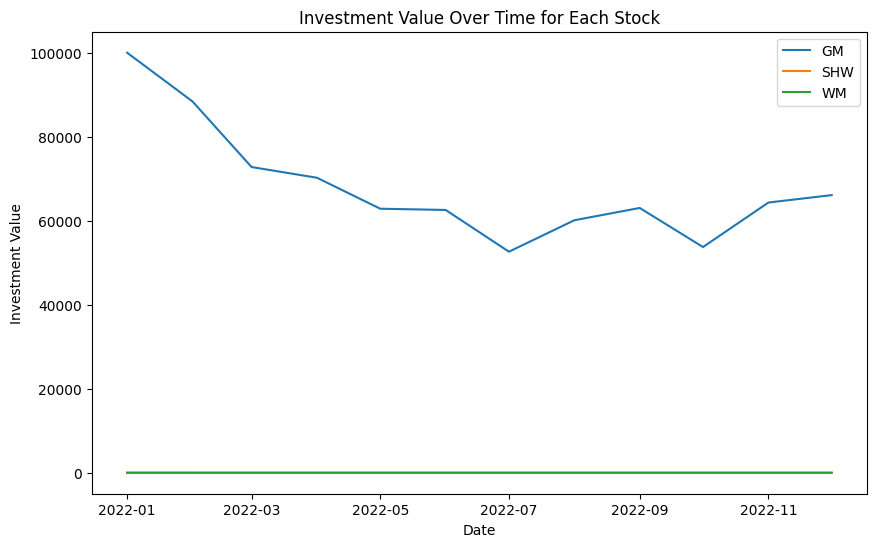

In [ ]:
import matplotlib.pyplot as plt

# Plot the investment values for each stock
for stock_name in allocation_amounts.keys():
    plt.plot(investment_df.index, investment_df[f"Investment_{stock_name}"], label=stock_name)

plt.title("Investment Value Over Time for Each Stock")
plt.xlabel("Date")
plt.ylabel("Investment Value")
plt.legend()
plt.show()


This plot illustrates the performance of each stock in our portfolio, from month to month, over the course of the year 2022. The changes in SHW and WM appear to be minimal compared to GM, given their limited presence in our portfolio.

## Momentum Trading Strategy on the S&P 500 Index

This section applies the Momentum Trading Strategy to the S&P 500 index (^GSPC).

In [ ]:
# Create a dictionary to store DataFrames for S&P 500 (^GSPC)
sp500 = {}

sp500_data = fetch_stock_data("^GSPC")

# Filter data for the year 2022 (minus 21 days to calculate for momentum calculations)
sp500_data_2022 = sp500_data[(sp500_data.index >= '2021-12-01') & (sp500_data.index <= '2023-01-01')]

# Store the resulting DataFrame in the dictionary
sp500_data = sp500_data_2022

# Create a column that shows return value in $ when the $100,000 is invested
sp500_data['portfolio'] = round(((sp500_data['system_return']*100000)),2)
# Create a column that sums the returns
sp500_data['portfolio_value'] = (sp500_data['portfolio'].cumsum())
# Create a column that adds the returns overtime
sp500_data['total'] = sp500_data['portfolio_value'].rolling(1).sum()
# Create a column that calculates the overall investment (principle + return)
sp500_data['Investment'] = sp500_data['total']+ 100000

# Create a DataFrame with the first day of each month as the index
monthly_index = pd.date_range(start='2022-01-01', end='2022-12-02', freq='MS')
portfolio_df = pd.DataFrame(index=monthly_index)

# Calculate the investment value for the first day of each month
portfolio_df['S&P 500 Return'] = investment_amount * sp500_data['portfolio_value'].resample('MS').first()
# Add whether we were invested and the return w
portfolio_df['Invested'] = sp500_data['invested'].resample('MS').first()
portfolio_df['Investment Value'] = sp500_data['Investment']

#Adjusted for the months that had NaN as the Investment Value, when the first of the month was a holiday/weekend
portfolio_df.loc["2022-01-01",'Investment Value'] = sp500_data.loc["2022-01-03",'Investment']
portfolio_df.loc["2022-05-01",'Investment Value'] = sp500_data.loc["2022-05-02",'Investment']
portfolio_df.loc["2022-10-01",'Investment Value'] = sp500_data.loc["2022-10-03",'Investment']


# Display the resulting DataFrames for each ticker
#print("^GSPC DataFrame:")
#print(sp500_data.head(-5))
portfolio_df

,S&P 500 Return,Invested,Investment Value
2022-01-01,1.824290e+08,1,101824.29
2022-02-01,-1.084880e+08,0,98915.12
2022-03-01,-6.419830e+08,0,93580.17
2022-04-01,-4.539470e+08,1,95460.53
2022-05-01,-6.747400e+08,0,93252.60
2022-06-01,-6.747400e+08,0,93252.60
2022-07-01,-1.791478e+09,0,82085.22
2022-08-01,-1.244448e+09,1,87555.52
2022-09-01,-1.460476e+09,0,85395.24
2022-10-01,-1.460476e+09,0,85395.24


The following blocks of code create a plot to visualize the use of the 8-21 Momentum Trading Strategy on the S&P 500 index.

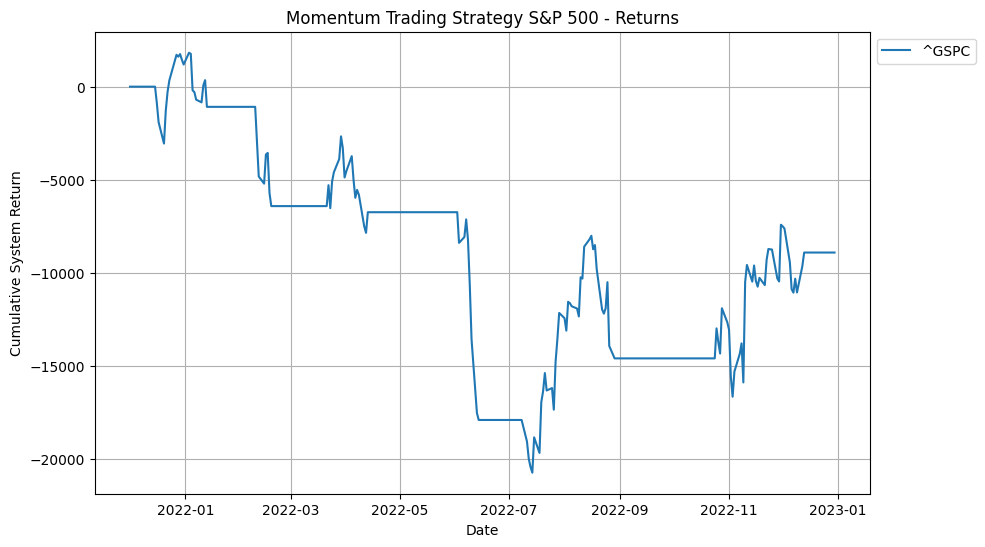

In [ ]:
# Plot the returns for the S&P 500 using the Momentum Trading Strategy
plt.figure(figsize=(10, 6))
plt.title("Momentum Trading Strategy S&P 500 - Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative System Return")

# Plot the performance
plt.plot(sp500_data.index, sp500_data['total'], label='^GSPC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

The above plot shows the cumulative returns, using the Momentum Trading Strategy, over the course of the year 2022, when investing $100,000 into the S&P 500.

This plot exhibits a similar trend to our portfolio, maintaining a downward trajectory until July, and rebounding later in the year.

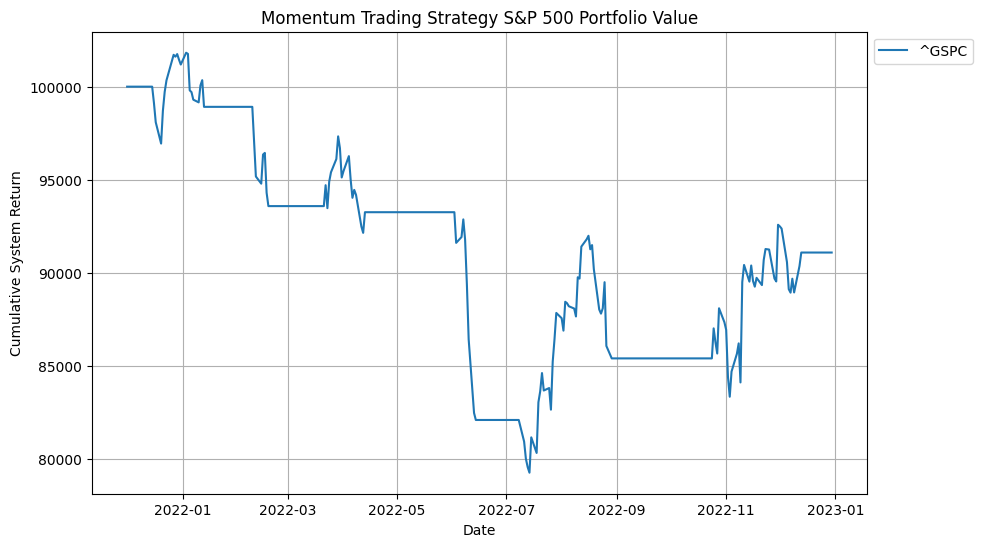

In [ ]:
# Plot the portfolio value for the S&P 500 using the Momentum Trading Strategy
plt.figure(figsize=(10, 6))
plt.title("Momentum Trading Strategy S&P 500 Portfolio Value")
plt.xlabel("Date")
plt.ylabel("Cumulative System Return")

# Plot the performance
plt.plot(sp500_data.index, sp500_data['Investment'], label='^GSPC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

While similar to the previous plot, this plot is different because it shows the dollar value, using the Momentum Trading Strategy, when investing $100,000 into the S&P 500. It is clear that the returns are not ideal: this investment would result in a loss.

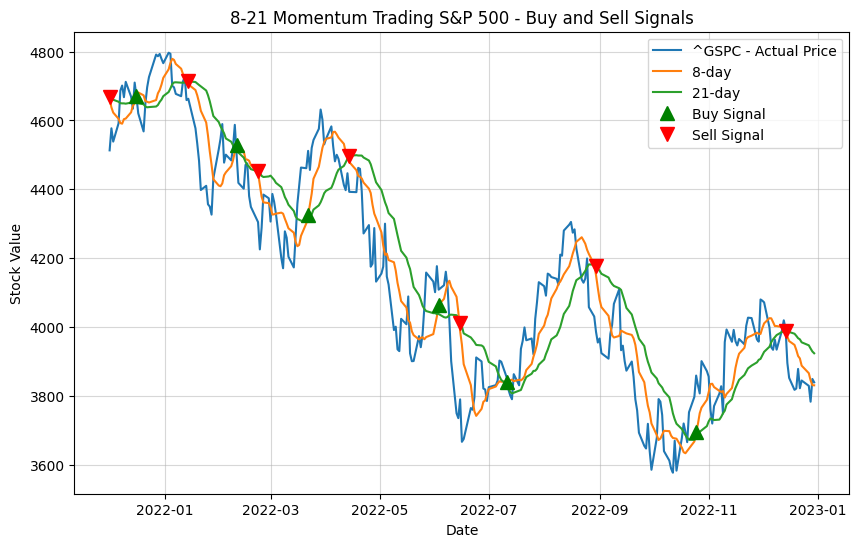

In [ ]:
# Plot to show the buy and sell signals throughout the year
plt.rcParams['figure.figsize'] = 10, 6
plt.grid(True, alpha = .5)
plt.title("8-21 Momentum Trading S&P 500 - Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Value")

# Plot three lines showing Price, 8-day and 21-day for S&P500
plt.plot(sp500_data.iloc[:]['Close'], label = '^GSPC - Actual Price')
plt.plot(sp500_data.iloc[:]['8-day'], label = '8-day')
plt.plot(sp500_data.iloc[:]['21-day'], label = '21-day')

# Plot the signal to buy or sell
plt.plot(sp500_data[:].loc[sp500_data.signal == 1].index, sp500_data[:]['8-day'][sp500_data.signal == 1], '^',
         color = 'g', markersize = 10, label = "Buy Signal")
plt.plot(sp500_data[:].loc[sp500_data.signal == -1].index, sp500_data[:]['21-day'][sp500_data.signal == -1], 'v',
         color = 'r', markersize = 10, label = "Sell Signal")
plt.legend(loc='upper right',bbox_to_anchor=(1, 1));

This plot indicates when we bought and sold across 2022. Additionally, it shows the 8-day and 21-day moving averages, which is how the Momentum Trading Strategy determines whether to buy or sell at each point in time.

## Buy-and-Hold strategy for the S&P 500 Index (^GSPC)

This section applies the Buy-and-Hold strategy to the S&P 500 index (^GSPC).

In [ ]:
import pandas as pd
import yfinance as yf

# Fetch historical data for ^GSPC from Yahoo Finance
gspc_data = yf.download('^GSPC', start='2022-01-01', end='2022-12-02')

# Clean the data by dropping any rows with NaN values
gspc_data_cleaned = gspc_data.dropna()

# Given an investment amount of 100000
investment_amount = 100000  # Adjust this based on actual investment amount

# Create a DataFrame with the first day of each month as the index
monthly_index = pd.date_range(start='2022-01-01', end='2022-12-02', freq='MS')
investment_df2 = pd.DataFrame(index=monthly_index)

# Calculate the number of shares for the buy-and-hold strategy
shares = investment_amount / gspc_data_cleaned['Close'].iloc[0]

# Calculate the investment value for the first day of each month
investment_df2['Investment_Value'] = shares * gspc_data_cleaned['Close'].resample('MS').first()

# Display the investment DataFrame
investment_df2

[*********************100%%**********************]  1 of 1 completed


,Investment_Value
2022-01-01,100000.000000
2022-02-01,94787.514042
2022-03-01,89778.084982
2022-04-01,94773.333551
2022-05-01,86632.499793
2022-06-01,85503.567773
2022-07-01,79751.530918
2022-08-01,85866.325711
2022-09-01,82701.979110
2022-10-01,76688.916363


This table shows how the Buy-and-Hold strategy for the S&P 500 Index changed from month to month in 2022. The initial invested value went down until July, reaching 79.8K. After that, it started going back up, reaching 85K by December.

## Strategy Comparison

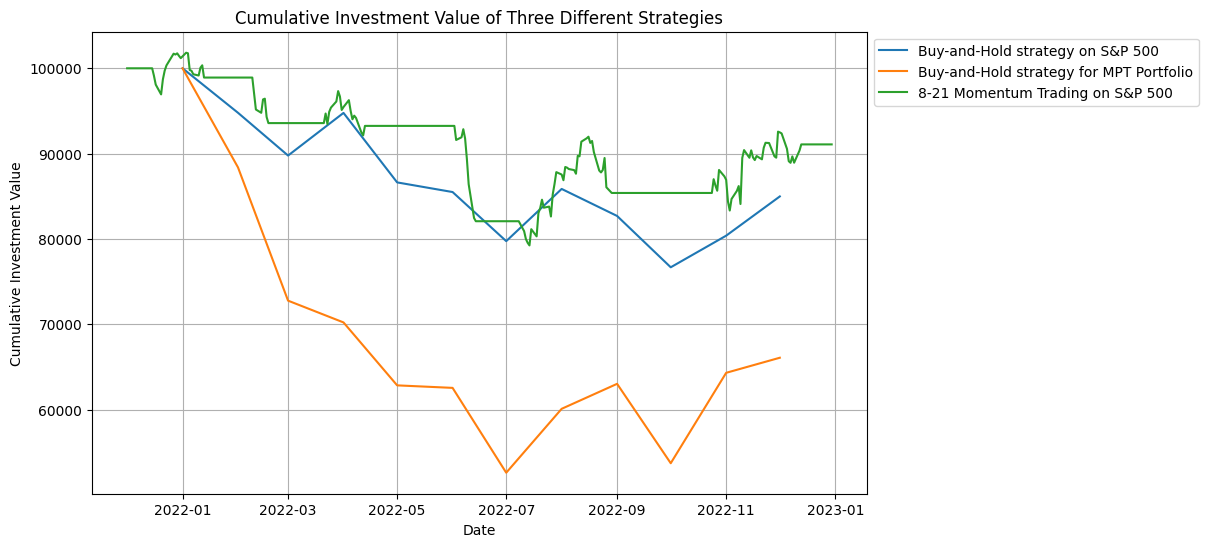

In [ ]:
import matplotlib.pyplot as plt

# Create a plot to compare the values of the three different investment strategies
plt.figure(figsize=(10, 6))
plt.title("Cumulative Investment Value of Three Different Strategies")
plt.xlabel("Date")
plt.ylabel("Cumulative Investment Value")

cumulative_returns = investment_df2['Investment_Value']
# Plot returns for Buy-and-Hold strategy on S&P 500
plt.plot(cumulative_returns.index, cumulative_returns, label='Buy-and-Hold strategy on S&P 500')
# Plot returns for Buy-and-Hold strategy for MPT Portfolio
plt.plot(investment_df.index, investment_df['Aggregate Investment Value'], label='Buy-and-Hold strategy for MPT Portfolio')
# Plot returns for 8-21 Momentum Trading on S&P 500
plt.plot(sp500_data.index, sp500_data['Investment'], label='8-21 Momentum Trading on S&P 500')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

This is a plot of the three strategies. It shows the returns on investment across the span of 2022. Looking at all three strategies, our returns are not looking good. No matter which strategy we choose, we will lose money. Thus, investing at the beginning of this year may not be a great decision.

Despite this, based on this graph, the most favorable strategy would be to use 8-21 Momentum Trading on the S&P 500 index. This strategy minimized loss compared to the other two strategies.

> Investment Strategy | Loss (USD) |
>--- | --- |
>Buy-and-Hold on the MPT | 34,000
>8-21 Momentum Trading on the S&P 500 | 7,500
>Buy-and-Hold on the S&P 500 | 15,000

# 5-Conclusion

Here are some closing thoughts and insights on what we have learned from our models and analysis.

1. In the initial visualizations, certain stocks appeared to have great success between 2017 and 2022. These were not necessarily the stocks chosen by the 8-21 Momentum Trading Strategy, however, because other stocks happened to have a better year, comparatively, in 2021. This demonstrates one of the major difficulties with analyzing stocks: both local and global trends are important to consider. While one stock might have a particularly succcessful period of time, they might not be the right choice in the long-term.

2. We created plots to compare three scenarios: (1) a Buy-and-Hold strategy on our custom 8-21 Momentum Trading portfolio from 2021, (2) 8-21 Momentum trading on the S&P 500 index (made up of 500 major companies), and (3) a Buy-and-Hold strategy for the S&P 500 index. The first scenario combines short-term and long-term methods, the second is a short-term strategy, and the third is a long-term approach. Among these, the most profitable with the least loss was (2) 8-21 Momentum Trading on the S&P 500 index. The issue with the first method might be combining a short-term strategy (Momentum Trading) with a long-term one (Buy-and-Hold), posing a potential risk in holding onto Momentum-traded stocks for an extended period. To address this, we could consider adding a different strategy, like value investing. This would evaluate a company's true value based on factors such as earnings and growth potential, regardless of recent market trends. This could balance our approach and enhance overall results. In general, for long-term investing, it's advisable to carefully select stocks if seeking profits.

3. In the final plot of the three trading strategies, it is particularly interesting to see the change in the market between June 2022 and July 2022. You can see a tremendous drop in the portfolio when using the 8-21 Momentum Trading Strategy. According to the graph, returns were negative across all strategies, which makes us wonder what happened during that month to cause a drop like that. Additionally, following the drop the Buy-and-Hold strategy surpassed the 8-21 Momentum Trading twice during the recovery of the portfolio, until the Momentum Trading made a full recovery. This is an interesting phenomenon.

4. While the Modern Portfolio Theory trains the model using historical data to find optimal solutions, it is important to keep in mind that there is still an inherent uncertainty in future outcomes, due to unexpected market conditions. This is evident in the graph above. The Modern Portfolio Buy-and-Hold strategy has much lower performance in comparison to the overall S&P 500 index, and has a steady decline for about half of 2022 before investment values increase again. This observation portrays the dynamic and unpredictable nature of the market, suggesting that strategies such as Momentum Trading trading, which allow for real-time adjustments as the market evolves, have greater potential for better short-term outcomes. However, they may not be suitable approaches for choosing stocks for the long-term investments.

5. By undertaking this project, we gained a deeper appreciation for revisiting the fundamentals of optimization. It provided an invaluable opportunity to understand its broad applicability. It was particularly fascinating to observe the same optimization method that we used in the classroom being applied to the context of investment strategies. We gained firsthand experience of the adaptability and versatility of these methods. It is clear that they can be utilized in a variety of scenarios, as long as we can adequately identify the objectives and constraints involved.